<a href="https://colab.research.google.com/github/Saumil-Agarwal/Aircraft_Accident-Hackerearth/blob/master/ML_hackeraarth_aircraft_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive & loading dataset


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%cd 
%ls

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [0]:
np.random.seed(1)
seed = 1

In [0]:
dataset = pd.read_csv('./train.csv')

In [0]:
dataset.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [0]:
dataset.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [0]:
X = dataset[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Accident_Type_Code','Max_Elevation','Violations',	'Adverse_Weather_Metric']]
print(X.head())

y = dataset[['Severity']]
print(y.head())

   Safety_Score  Days_Since_Inspection  ...  Violations  Adverse_Weather_Metric
0     49.223744                     14  ...           3                0.424352
1     62.465753                     10  ...           2                0.352350
2     63.059361                     13  ...           3                0.003364
3     48.082192                     11  ...           1                0.211728
4     26.484018                     13  ...           2                0.176883

[5 rows x 10 columns]
                                  Severity
0                Minor_Damage_And_Injuries
1                Minor_Damage_And_Injuries
2        Significant_Damage_And_Fatalities
3  Significant_Damage_And_Serious_Injuries
4        Significant_Damage_And_Fatalities


In [0]:
count = y['Severity'].value_counts() 
print(count)

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64


In [0]:
for i in range(0,11): 
  pca = PCA(n_components = i)
  pca.fit(X)
  print(sum(pca.explained_variance_ratio_))

0
0.9999946599676565
0.9999976587846312
0.9999992451162554
0.9999997883344002
0.9999998740728667
0.9999999484182496
0.9999999871563238
0.9999999992430363
0.9999999999038244
1.0000000000000002


In [0]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(X)


In [0]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y['Severity'], test_size=0.1,random_state = seed)

In [0]:
X_tr, X_cross, y_tr, y_cross = train_test_split(X_tr, y_tr, test_size=0.1,random_state = seed)

In [0]:
count = y_tr.value_counts() 
print(count)
print("\nTest")
count_1 = y_tst.value_counts() 
print(count_1)
print("\nCross")
count_2 = y_cross.value_counts() 
print(count_2)  

Highly_Fatal_And_Damaging                  2469
Significant_Damage_And_Serious_Injuries    2227
Minor_Damage_And_Injuries                  2048
Significant_Damage_And_Fatalities          1356
Name: Severity, dtype: int64

Test
Highly_Fatal_And_Damaging                  322
Minor_Damage_And_Injuries                  252
Significant_Damage_And_Serious_Injuries    249
Significant_Damage_And_Fatalities          177
Name: Severity, dtype: int64

Cross
Highly_Fatal_And_Damaging                  258
Significant_Damage_And_Serious_Injuries    253
Minor_Damage_And_Injuries                  227
Significant_Damage_And_Fatalities          162
Name: Severity, dtype: int64


In [0]:
#AFTER CORRELATION MATRIX
X_tr, X_tst, y_tr, y_tst = train_test_split(dataset[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Max_Elevation',	'Violations',	'Adverse_Weather_Metric']], y['Severity'], test_size=0.1,random_state = seed)

# Shallow models

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

## Models with low accuracy

In [0]:
#KNN Model
clf=KNeighborsClassifier(n_neighbors=4,algorithm='brute',n_jobs=-1,leaf_size=100)
clf.fit(X_tr, y_tr)
predicted= clf.predict(X_tst)
print("Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))
print(KNeighborsClassifier())

Accuracy: 0.485     F1 Score:0.47593311504906444
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [0]:
#Naive Bayes Model
clf=BernoulliNB()
clf.fit(X_tr, y_tr)
predicted= clf.predict(X_tst)
print( "Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))
print(BernoulliNB())

Accuracy: 0.284     F1 Score:0.12607476635514017
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [0]:

#SVC Model
clf=SVC()
clf.fit(X_tr, y_tr)
predicted= clf.predict(X_tst)
print("Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))

Accuracy: 0.285     F1 Score:0.12642023346303502


In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='auto',verbose = 1)
clf.fit(X_tr, y_tr)
predicted= clf.predict(X_tst)
print("Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.384     F1 Score:0.35281192099469477


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


In [0]:
#Ada Boost Model
clf=AdaBoostClassifier(n_estimators=100,learning_rate=1)
model = clf.fit(X_tr, y_tr)
predicted= model.predict(X_tst)
print("Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))
print(AdaBoostClassifier())

Accuracy: 0.553     F1 Score:0.5140294806252687
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


In [0]:
#SGD Model
clf=SGDClassifier()
model = clf.fit(X_tr, y_tr)
predicted= model.predict(X_tst)
print("Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))
print(SGDClassifier())

Accuracy: 0.236     F1 Score:0.09149913666168791
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


##Models with medium accuracy

In [0]:
from sklearn.svm import NuSVC
clf = NuSVC(kernel = 'linear',multi_class='auto')
clf.fit(X_tr, y_tr)
predicted= clf.predict(X_tst)
print("Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))

In [0]:
from sklearn.svm import SVC 
clf = SVC(kernel = 'linear', C = 4)
clf.fit(X_tr, y_tr)
predicted= clf.predict(X_tst)
print("Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))

Accuracy: 0.614     F1 Score:0.6041200373455015


In [0]:
#Decision Tree Model 
clf=DecisionTreeClassifier(min_samples_leaf=3, max_depth=4)
clf.fit(X_tr, y_tr)
predicted= clf.predict(X_tst)
print("Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))

0.669


##Models with high accuracy

In [0]:
#Random Forest Model
clf=RandomForestClassifier(n_estimators=1000,min_samples_leaf=3)
clf.fit(X, y['Severity'])
predicted= clf.predict(X_tst)
print("Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))# print(RandomForestClassifier())

Accuracy: 0.986     F1 Score:0.9860368650370775


In [0]:
# #Tuning Parameters
# rfc = RandomForestClassifier()
# parameters = {
#     "n_estimators":[5,10,50,100],
#     "max_depth":[2,4,8,16,32,64,None],
#     "min_samples_leaf":[1,5,10,50]
# }
# cv = GridSearchCV(rfc,parameters,cv=5)
# cv.fit(X_tr,y_tr.values.ravel())
# print(f'Best parameters are: {cv.best_params_}')
# # print("\n")
# mean_score = cv.cv_results_['mean_test_score']
# std_score = cv.cv_results_['std_test_score']
# params = cv.cv_results_['params']
# for mean,std,params in zip(mean_score,std_score,params):
#   print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [0]:
#Gradient Boost Model
clf=GradientBoostingClassifier()
model = clf.fit(X_tr, y_tr,)
predicted= model.predict(X_tst)
print("Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))
print(GradientBoostingClassifier())

Accuracy: 0.891     F1 Score:0.8916254841095659
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [0]:
#Bagging Model
clf=BaggingClassifier(n_estimators=100)
model = clf.fit(X_tr, y_tr)
predicted= model.predict(X_tst)
print("Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')))
print(BaggingClassifier())

Accuracy: 0.957     F1 Score:0.9570164279796425
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


##Test data and file saving

In [0]:
#To evaluate the model's predictions
report = classification_report(y_tst, predicted)
print(report)
matrix = confusion_matrix(y_tst, predicted)
print(matrix)

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       1.00      1.00      1.00       322
              Minor_Damage_And_Injuries       1.00      1.00      1.00       252
      Significant_Damage_And_Fatalities       1.00      1.00      1.00       177
Significant_Damage_And_Serious_Injuries       1.00      1.00      1.00       249

                               accuracy                           1.00      1000
                              macro avg       1.00      1.00      1.00      1000
                           weighted avg       1.00      1.00      1.00      1000

[[322   0   0   0]
 [  0 252   0   0]
 [  0   0 177   0]
 [  0   0   0 249]]


In [0]:
test_dataset = pd.read_csv('./test.csv')

In [0]:

print(test_dataset.head())
test_dataset_X = test_dataset[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Max_Elevation',	'Accident_Type_Code','Violations',	'Adverse_Weather_Metric']]
print((test_dataset_X))

   Safety_Score  Days_Since_Inspection  ...  Adverse_Weather_Metric  Accident_ID
0     19.497717                     16  ...                0.069692            1
1     58.173516                     15  ...                0.002777           10
2     33.287671                     15  ...                0.004316           14
3      3.287671                     21  ...                0.199990           17
4     10.867580                     18  ...                0.483696           21

[5 rows x 11 columns]
      Safety_Score  Days_Since_Inspection  ...  Violations  Adverse_Weather_Metric
0        19.497717                     16  ...           2                0.069692
1        58.173516                     15  ...           2                0.002777
2        33.287671                     15  ...           1                0.004316
3         3.287671                     21  ...           2                0.199990
4        10.867580                     18  ...           2                0.

In [0]:
test_predict = clf.predict(test_dataset_X)
y_submission = pd.concat([test_dataset[['Accident_ID']],pd.DataFrame(test_predict,columns=['Severity'])], axis=1, sort=False)
print(y_submission)


      Accident_ID                                 Severity
0               1                Highly_Fatal_And_Damaging
1              10        Significant_Damage_And_Fatalities
2              14  Significant_Damage_And_Serious_Injuries
3              17                Highly_Fatal_And_Damaging
4              21        Significant_Damage_And_Fatalities
...           ...                                      ...
2495        12484  Significant_Damage_And_Serious_Injuries
2496        12487  Significant_Damage_And_Serious_Injuries
2497        12488  Significant_Damage_And_Serious_Injuries
2498        12491  Significant_Damage_And_Serious_Injuries
2499        12493                Highly_Fatal_And_Damaging

[2500 rows x 2 columns]


In [0]:
y_submission.to_csv('./y_submission_rf_dat.csv',index=False)
# score_not_normalize - 85.33359
# score_normalize - 84.22388
pickle.dump(clf, open('./weights_rf_dat.sav', 'wb'))

# Random Forest

In [0]:
#Random Forest Model
# for learning_rate in [0.01,0.03,0.05,0.1,0.3,0.33,0.36,0.4,0.5,0.6,0.7,0.8,0.9,1,3] :

clf=RandomForestClassifier(n_estimators=200,min_samples_leaf=3)
clf.fit(X_tr, y_tr)
predicted= clf.predict(X_tst)
print(metrics.accuracy_score(y_tst, predicted))
print(RandomForestClassifier())

0.909
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [0]:
print(predicted)

NameError: ignored

In [0]:
print(y_tst)

In [0]:
#To evaluate the model's predictions
report = classification_report(y_tst, predicted)
print(report)
matrix = confusion_matrix(y_tst, predicted)
print(matrix)

In [0]:
test_dataset = pd.read_csv('./test.csv')

In [0]:
print(test_dataset.head())
test_dataset_X = test_dataset[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Accident_Type_Code','Max_Elevation',	'Violations',	'Adverse_Weather_Metric']]
print((test_dataset_X))

   Safety_Score  Days_Since_Inspection  ...  Adverse_Weather_Metric  Accident_ID
0     19.497717                     16  ...                0.069692            1
1     58.173516                     15  ...                0.002777           10
2     33.287671                     15  ...                0.004316           14
3      3.287671                     21  ...                0.199990           17
4     10.867580                     18  ...                0.483696           21

[5 rows x 11 columns]
      Safety_Score  Days_Since_Inspection  ...  Violations  Adverse_Weather_Metric
0        19.497717                     16  ...           2                0.069692
1        58.173516                     15  ...           2                0.002777
2        33.287671                     15  ...           1                0.004316
3         3.287671                     21  ...           2                0.199990
4        10.867580                     18  ...           2                0.

In [0]:
test_predict = clf.predict(test_dataset_X)

In [0]:
print(test_predict)

['Highly_Fatal_And_Damaging' 'Significant_Damage_And_Fatalities'
 'Significant_Damage_And_Serious_Injuries' ...
 'Significant_Damage_And_Serious_Injuries'
 'Significant_Damage_And_Serious_Injuries' 'Highly_Fatal_And_Damaging']


In [0]:
y_submission = pd.concat([test_dataset[['Accident_ID']],pd.DataFrame(test_predict,columns=['Severity'])], axis=1, sort=False)

In [0]:
print(y_submission)

      Accident_ID                                 Severity
0               1                Highly_Fatal_And_Damaging
1              10        Significant_Damage_And_Fatalities
2              14  Significant_Damage_And_Serious_Injuries
3              17  Significant_Damage_And_Serious_Injuries
4              21        Significant_Damage_And_Fatalities
...           ...                                      ...
2495        12484                Highly_Fatal_And_Damaging
2496        12487  Significant_Damage_And_Serious_Injuries
2497        12488  Significant_Damage_And_Serious_Injuries
2498        12491  Significant_Damage_And_Serious_Injuries
2499        12493                Highly_Fatal_And_Damaging

[2500 rows x 2 columns]


In [0]:
y_submission.to_csv('./y_submission.csv',index=False)
# score - 80.94032

In [0]:
pickle.dump(clf, open('./weights_rand_forest_1.sav', 'wb'))

# Random Forest 2

In [0]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Turbulence_In_gforces']], y['Severity'], test_size=0.4)


In [0]:
#Random Forest Model
clf=RandomForestClassifier(n_estimators=200,min_samples_leaf=3)
clf.fit(X_tr, y_tr)
predicted= clf.predict(X_tst)
print(metrics.accuracy_score(y_tst, predicted))
print(RandomForestClassifier())

0.83275
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = seed)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [0]:
onehotencoder = preprocessing.OneHotEncoder(categories = 'auto' )
y_tr=y_tr.values
y_one_hot = onehotencoder.fit_transform(y_tr.reshape(-1,1)).toarray()

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [0]:
#  Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=seed, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_tr, y_one_hot)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
rf_random.best_params_


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [0]:
#Random Forest Model
clf=RandomForestClassifier(n_estimators=1600,min_samples_leaf=1,min_samples_split=2,max_features='auto',max_depth=110,bootstrap= True)
clf.fit(X,y['Severity'])
predicted= clf.predict(X_tst)
print(metrics.accuracy_score(y_tst, predicted))
print(RandomForestClassifier())

1.0
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [0]:
#To evaluate the model's predictions
report = classification_report(y_tst, predicted)
print(report)
matrix = confusion_matrix(y_tst, predicted)
print(matrix)

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.93      0.95       322
              Minor_Damage_And_Injuries       0.91      0.96      0.93       252
      Significant_Damage_And_Fatalities       0.95      0.93      0.94       177
Significant_Damage_And_Serious_Injuries       0.94      0.94      0.94       249

                               accuracy                           0.94      1000
                              macro avg       0.94      0.94      0.94      1000
                           weighted avg       0.94      0.94      0.94      1000

[[300   9   5   8]
 [  4 242   3   3]
 [  3   6 165   3]
 [  4  10   0 235]]


In [0]:
test_dataset = pd.read_csv('./test.csv')

In [0]:
print(test_dataset.head())
test_dataset_X = test_dataset[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Turbulence_In_gforces']]
print((test_dataset_X))

   Safety_Score  Days_Since_Inspection  ...  Adverse_Weather_Metric  Accident_ID
0     19.497717                     16  ...                0.069692            1
1     58.173516                     15  ...                0.002777           10
2     33.287671                     15  ...                0.004316           14
3      3.287671                     21  ...                0.199990           17
4     10.867580                     18  ...                0.483696           21

[5 rows x 11 columns]
      Safety_Score  ...  Turbulence_In_gforces
0        19.497717  ...               0.388959
1        58.173516  ...               0.250841
2        33.287671  ...               0.336669
3         3.287671  ...               0.421775
4        10.867580  ...               0.313228
...            ...  ...                    ...
2495     68.127854  ...               0.470819
2496     54.840183  ...               0.417087
2497     36.712329  ...               0.313950
2498     38.721461  .

In [0]:
test_predict = clf.predict(test_dataset_X)

ValueError: ignored

In [0]:
print(test_predict)

['Highly_Fatal_And_Damaging' 'Significant_Damage_And_Fatalities'
 'Significant_Damage_And_Serious_Injuries' ...
 'Significant_Damage_And_Serious_Injuries'
 'Significant_Damage_And_Serious_Injuries' 'Highly_Fatal_And_Damaging']


In [0]:
y_submission = pd.concat([test_dataset[['Accident_ID']],pd.DataFrame(test_predict,columns=['Severity'])], axis=1, sort=False)

In [0]:
print(y_submission)

      Accident_ID                                 Severity
0               1                Highly_Fatal_And_Damaging
1              10        Significant_Damage_And_Fatalities
2              14  Significant_Damage_And_Serious_Injuries
3              17                Highly_Fatal_And_Damaging
4              21                Highly_Fatal_And_Damaging
...           ...                                      ...
2495        12484                Minor_Damage_And_Injuries
2496        12487  Significant_Damage_And_Serious_Injuries
2497        12488  Significant_Damage_And_Serious_Injuries
2498        12491  Significant_Damage_And_Serious_Injuries
2499        12493                Highly_Fatal_And_Damaging

[2500 rows x 2 columns]


In [0]:
y_submission.to_csv('./y_submission_2.csv',index=False)
# submission 2 -73% test

In [0]:
pickle.dump(clf, open('./weights_rand_forest_2.sav', 'wb'))

# XGBoost

In [0]:
# test_size = 0.2 0.3 - 0.9565
# test_size - 0.1 # learning rate: 0.9    Accuracy: 0.971     F1 Score:0.9709998840168548
# test_size - 0.05 learning rate: 0.7    Accuracy: 0.96     F1 Score:0.9598699440788372
# test_size - 0.15 learning rate: 0.6    Accuracy: 0.952     F1 Score:0.9519948655531886

for learning_rate in [0.01,0.03,0.05,0.1,0.3,0.33,0.36,0.4,0.43,0.46,0.5,0.55,0.6,0.62,0.65,0.68,0.7,0.8,0.85,0.86,0.9,1,2,3] :
# learning_rate = 0.9
  clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                      learning_rate=learning_rate,n_estimators=50,
                      max_depth=5, min_child_weigth = 5,gamma=0,subsample=0.9, colsample_bytree = 0.7,scale_pos_weight = 1,seed = 27)
      
  model = clf.fit(X_tr, y_tr)
  predicted= model.predict(X_tst)
  print('Test set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')) )
  predicted= model.predict(X_tr)
  print('Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tr, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tr, predicted,average='weighted')) )


Test setlearning rate: 0.01    Accuracy: 0.807     F1 Score:0.8070707234152454
Training setlearning rate: 0.01    Accuracy: 0.7985555555555556     F1 Score:0.7985245114791164
Test setlearning rate: 0.03    Accuracy: 0.839     F1 Score:0.8390088045361258
Training setlearning rate: 0.03    Accuracy: 0.8465555555555555     F1 Score:0.8467563586761109
Test setlearning rate: 0.05    Accuracy: 0.884     F1 Score:0.8837165036990221
Training setlearning rate: 0.05    Accuracy: 0.891     F1 Score:0.8911962468535565
Test setlearning rate: 0.1    Accuracy: 0.926     F1 Score:0.9260291433026592
Training setlearning rate: 0.1    Accuracy: 0.9437777777777778     F1 Score:0.9438856871571716
Test setlearning rate: 0.3    Accuracy: 0.956     F1 Score:0.9559682878329859
Training setlearning rate: 0.3    Accuracy: 0.9865555555555555     F1 Score:0.9865502081877354
Test setlearning rate: 0.33    Accuracy: 0.956     F1 Score:0.9559396853398702
Training setlearning rate: 0.33    Accuracy: 0.9886666666666667

In [0]:
print(clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='auc',
              gamma=0, learning_rate=3, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_child_weigth=3, missing=None,
              n_estimators=120, n_jobs=1, nthread=None, num_class=4,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
              subsample=0.7, verbosity=1)


In [0]:
# learning rate: 0.01    Accuracy: 0.866     F1 Score:0.8663424391636447
# learning rate: 0.03    Accuracy: 0.938     F1 Score:0.9382056446053553
# learning rate: 0.05    Accuracy: 0.955     F1 Score:0.9549809896249455
# learning rate: 0.1    Accuracy: 0.961     F1 Score:0.9609117076882188
# learning rate: 0.3    Accuracy: 0.969     F1 Score:0.9689758178901036
# learning rate: 0.33    Accuracy: 0.974     F1 Score:0.9739929383939829
# learning rate: 0.36    Accuracy: 0.97     F1 Score:0.9699437459912866
# learning rate: 0.4    Accuracy: 0.969     F1 Score:0.9689576292037758
# learning rate: 0.5    Accuracy: 0.966     F1 Score:0.9660181603315411
# learning rate: 0.6    Accuracy: 0.97     F1 Score:0.9699693951422174
# learning rate: 0.7    Accuracy: 0.97     F1 Score:0.9699524434192655
# learning rate: 0.8    Accuracy: 0.963     F1 Score:0.962948281846581
# learning rate: 0.9    Accuracy: 0.971     F1 Score:0.9709998840168548
# learning rate: 1    Accuracy: 0.961     F1 Score:0.9609400478197404
# learning rate: 2    Accuracy: 0.947     F1 Score:0.9469604033448432
# learning rate: 3    Accuracy: 0.537     F1 Score:0.5366988888294075

In [0]:
clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                      learning_rate=0.8,n_estimators=50,
                      max_depth=5, min_child_weigth = 5,gamma=0,subsample=0.9, colsample_bytree = 0.7,scale_pos_weight = 1,seed = 27)
model = clf.fit(X_tr, y_tr)
predicted= model.predict(X_tst)
print('Test set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')) )
predicted_train= model.predict(X_tr)
print('Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tr, predicted_train)) + "     F1 Score:"+ str(metrics.f1_score(y_tr, predicted_train,average='weighted')) )


Test setlearning rate: 3    Accuracy: 0.966     F1 Score:0.9659630976312223
Training setlearning rate: 3    Accuracy: 1.0     F1 Score:1.0


In [0]:
#To evaluate the model's predictions
report = classification_report(y_tst, predicted)
print(report)
matrix = confusion_matrix(y_tst, predicted)
print(matrix)

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.95      0.96       304
              Minor_Damage_And_Injuries       0.97      0.98      0.98       254
      Significant_Damage_And_Fatalities       0.96      0.98      0.97       167
Significant_Damage_And_Serious_Injuries       0.97      0.96      0.96       275

                               accuracy                           0.97      1000
                              macro avg       0.97      0.97      0.97      1000
                           weighted avg       0.97      0.97      0.97      1000

[[290   4   4   6]
 [  3 249   1   1]
 [  1   0 164   2]
 [  8   3   1 263]]


## Test data and file saving

In [0]:
test_dataset = pd.read_csv('./test.csv')

In [0]:

print(test_dataset.head())
test_dataset_X = test_dataset[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Accident_Type_Code','Max_Elevation',	'Violations',	'Adverse_Weather_Metric']]
print((test_dataset_X))

   Safety_Score  Days_Since_Inspection  ...  Adverse_Weather_Metric  Accident_ID
0     19.497717                     16  ...                0.069692            1
1     58.173516                     15  ...                0.002777           10
2     33.287671                     15  ...                0.004316           14
3      3.287671                     21  ...                0.199990           17
4     10.867580                     18  ...                0.483696           21

[5 rows x 11 columns]
      Safety_Score  Days_Since_Inspection  ...  Violations  Adverse_Weather_Metric
0        19.497717                     16  ...           2                0.069692
1        58.173516                     15  ...           2                0.002777
2        33.287671                     15  ...           1                0.004316
3         3.287671                     21  ...           2                0.199990
4        10.867580                     18  ...           2                0.

In [0]:
test_predict = clf.predict(test_dataset_X)
y_submission = pd.concat([test_dataset[['Accident_ID']],pd.DataFrame(test_predict,columns=['Severity'])], axis=1, sort=False)
print(y_submission)


      Accident_ID                                 Severity
0               1                Highly_Fatal_And_Damaging
1              10        Significant_Damage_And_Fatalities
2              14  Significant_Damage_And_Serious_Injuries
3              17                Highly_Fatal_And_Damaging
4              21                Highly_Fatal_And_Damaging
...           ...                                      ...
2495        12484                Highly_Fatal_And_Damaging
2496        12487  Significant_Damage_And_Serious_Injuries
2497        12488  Significant_Damage_And_Serious_Injuries
2498        12491  Significant_Damage_And_Serious_Injuries
2499        12493                Highly_Fatal_And_Damaging

[2500 rows x 2 columns]


In [0]:
y_submission.to_csv('./y_submission_xg_boost_12.csv',index=False)
# score_not_normalize - 85.33359
# score_normalize - 84.22388
pickle.dump(clf, open('./weights_xg_boost_12.sav', 'wb'))

# ANN

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Activation

from sklearn import preprocessing
import sys

In [0]:
onehotencoder = preprocessing.OneHotEncoder(categories = 'auto' )
y=y.values
y_one_hot = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()

AttributeError: ignored

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y_one_hot,test_size = 0.2)


In [0]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y_one_hot, test_size=0.1,random_state = seed)

In [0]:
X_tr, X_cross, y_tr, y_cross = train_test_split(X_tr, y_tr, test_size=0.12,random_state = seed)

In [0]:
# model = Sequential()
# model.add(Dense(25, input_dim=X.shape[1], activation='relu'))
# model.add(Dropout(0.3))
# # model.add(Dense(20, activation='relu'))
# # model.add(Dense(25, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.7))
# model.add(Dense(25, activation='relu'))
# model.add(Dense(15, activation='relu'))
# model.add(Dense(15, activation='relu'))

# model.add(Dropout(0.5))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(4, activation='softmax'))



SyntaxError: ignored

In [0]:
model = Sequential()
model.add(Dense(25, input_dim=X.shape[1], activation='relu'))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(25))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(15))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(15))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(4, activation='softmax'))


In [0]:
#Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit Keras Model.
history = model.fit(X_train, y_train, epochs=150, batch_size=64)

# Make Predictions
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:'+ str(a*100) + "F1 Score:"+ str(metrics.f1_score(test, pred,average='weighted')))




# Make Predictions
y_pred_train = model.predict(X_train)
#Converting predictions to label
pred_train = list()
for i in range(len(y_pred_train)):
    pred_train.append(np.argmax(y_pred_train[i]))
#Converting one hot encoded test label to label
train = list()
for i in range(len(y_train)):
    train.append(np.argmax(y_train[i]))

from sklearn.metrics import accuracy_score
a = accuracy_score(pred_train,train)
print('Accuracy is:'+ str(a*100) + "F1 Score:"+ str(metrics.f1_score(train, pred_train,average='weighted')))

Epoch 1/150
8000/8000 [==============================] - 2s 213us/step - loss: 1.9049 - acc: 0.3046
Epoch 2/150
8000/8000 [==============================] - 1s 86us/step - loss: 1.8938 - acc: 0.3068
Epoch 3/150
8000/8000 [==============================] - 1s 85us/step - loss: 1.8125 - acc: 0.3047
Epoch 4/150
8000/8000 [==============================] - 1s 84us/step - loss: 1.7418 - acc: 0.3083
Epoch 5/150
8000/8000 [==============================] - 1s 87us/step - loss: 1.7581 - acc: 0.3076
Epoch 6/150
8000/8000 [==============================] - 1s 84us/step - loss: 1.7905 - acc: 0.3062
Epoch 7/150
8000/8000 [==============================] - 1s 89us/step - loss: 1.7809 - acc: 0.3040
Epoch 8/150
8000/8000 [==============================] - 1s 82us/step - loss: 1.7217 - acc: 0.3059
Epoch 9/150
8000/8000 [==============================] - 1s 85us/step - loss: 1.7597 - acc: 0.3065
Epoch 10/150
8000/8000 [==============================] - 1s 85us/step - loss: 1.7458 - acc: 0.3062
Epoch 11

*italicized text*# New Section

# XGboost parameter tuning

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

In [0]:
cv = StratifiedKFold(n_splits =10, shuffle=True)
cv.split(X, y['Severity'])

<generator object _BaseKFold.split at 0x7ff2f7fc4780>

In [0]:
learning_rate = 0.3
n_estimators_range = np.linspace(1, 200, 10).astype('int')
train_scores, test_scores = validation_curve(
    XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                      learning_rate=learning_rate,
                      max_depth=5, min_child_weigth = 3,gamma=0,subsample=0.7, colsample_bytree = 0.9,scale_pos_weight = 1,
                      cv=cv,scoring= ['auc', 'accuracy']),X, y['Severity'],
    param_name = 'n_estimators',
    param_range = n_estimators_range,
    cv=cv,
    scoring='f1_weighted')

KeyboardInterrupt: ignored

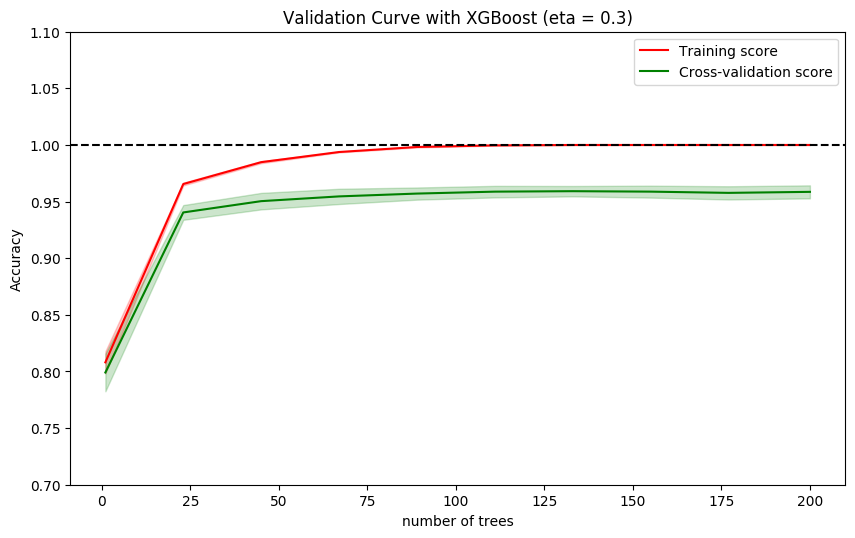

Best cross-validation result (0.96) obtained for 133 trees


In [0]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with XGBoost (eta = 0.3)")
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.1)

plt.plot(n_estimators_range,
             train_scores_mean,
             label="Training score",
             color="r")

plt.plot(n_estimators_range,
             test_scores_mean,
             label="Cross-validation score",
             color="g")

plt.fill_between(n_estimators_range,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.2, color="r")

plt.fill_between(n_estimators_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")

plt.axhline(y=1, color='k', ls='dashed')

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print("Best cross-validation result ({0:.2f}) obtained for {1} trees".format(test_scores_mean[i], n_estimators_range[i]))


In [0]:
# ooster='gbtree',eval_metric = 'auc', 
# scale_pos_weight = 1,seed = 27)
# 'gamma':0

params_grid = {
    # 'max_depth': [1,2, 3,4,5,6,7,8,9],
    'n_estimators': [i for i in range(100,200,5)]
    # 'learning_rate': [0.03,0.1,0.3,0.5,0.6,0.7,0.8,0.9,1,3],
    # 'min_child_weigth' : [1,2,3,4,5,6,7,8,9,10],
    # 'gamma': [i/10.0 for i in range(0,20)],
    # 'subsample' : [0.5,0.7,0.9],
    # 'colsample_bytree':[0.5,0.7,0.9] 
}

params_fixed = {
    'objective': 'multi:softmax','num_class':4,'verbosity':1, 'eval_metric' : 'auc','subsample':0.8,'colsample_bytree':0.8,
    'scale_pos_weight ':1,'learning_rate':0.3 ,'n_threads':-1,'seed':27, 'min_child_weigth':1,'max_depth':8
}

In [0]:
bst_grid = GridSearchCV(
    estimator=XGBClassifier(**params_fixed),
    param_grid=params_grid,
    cv=cv,n_jobs=-1,
    scoring='f1_weighted')


In [0]:
bst_grid.fit(X, y['Severity'])


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, eval_metric='auc',
                                     gamma=0, learning_rate=0.3,
                                     max_delta_step=0, max_depth=8,
                                     min_child_weight=1, min_child_weigth=1,
                                     missing=None, n_estimators=100, n...
                                     objective='multi:softmax', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, scale_pos_weight =1,
                                     seed=27, silent=None, subsample=0.8,
                                     verbosity=1),
             iid='deprecated', n_

In [0]:
bst_grid.cv_results_


{'mean_fit_time': array([ 6.89844217,  7.00165546,  7.29469674,  7.71517632,  7.84382987,
         8.17906318,  8.51049027,  8.73692036,  8.97675831,  9.33356726,
         9.47184043,  9.86301343, 10.00916398, 10.30231795, 10.6024812 ,
        10.72654793, 11.06267335, 11.2117141 , 11.55244761, 11.50516152]),
 'mean_score_time': array([0.05844581, 0.05744131, 0.0608892 , 0.06744866, 0.06579623,
        0.06490154, 0.06885927, 0.07129779, 0.07522225, 0.07754979,
        0.08080533, 0.07996318, 0.08342445, 0.08419137, 0.08513427,
        0.08570237, 0.08977501, 0.09606476, 0.10136163, 0.09415572]),
 'mean_test_score': array([0.96271399, 0.96291094, 0.96271463, 0.96301684, 0.96281421,
        0.96281676, 0.96301561, 0.96311311, 0.96291702, 0.96271491,
        0.96281296, 0.96281639, 0.96261504, 0.96261559, 0.96281193,
        0.96281307, 0.96300962, 0.96301181, 0.96271328, 0.96271254]),
 'param_n_estimators': masked_array(data=[100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150,
      

In [0]:
print("Best accuracy obtained: {0}".format(bst_grid.best_score_))
print("Parameters:")
for key, value in bst_grid.best_params_.items():
    print("\t{}: {}".format(key, value))

# # Best accuracy obtained: 0.9633916689592361
# Parameters:
# 	learning_rate: 0.3
# 	n_estimators: 175

Best accuracy obtained: 0.9631131129352821
Parameters:
	n_estimators: 135


In [0]:
learning_rate=0.3
clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                      learning_rate=learning_rate,n_estimators=175,
                      max_depth=8, min_child_weigth = 1,gamma=0.3,subsample=0.8, colsample_bytree = 0.8,scale_pos_weight = 1,seed = 27)
    
model = clf.fit(X, y['Severity'])
predicted= model.predict(X_tst)
print('Test set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted')) )
predicted= model.predict(X_tr)
print('Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tr, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tr, predicted,average='weighted')) )


Test setlearning rate: 0.3    Accuracy: 1.0     F1 Score:1.0
Training setlearning rate: 0.3    Accuracy: 1.0     F1 Score:1.0


# Feature Engineering

In [0]:
import seaborn as sns


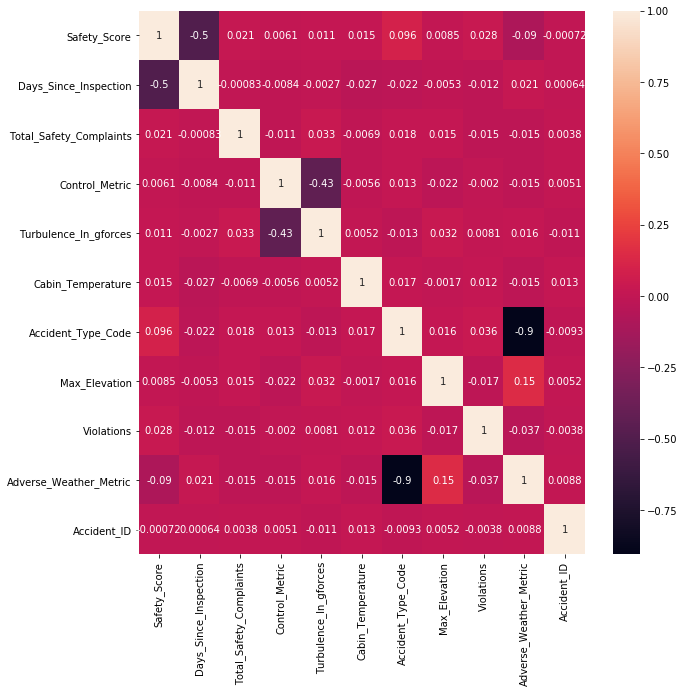

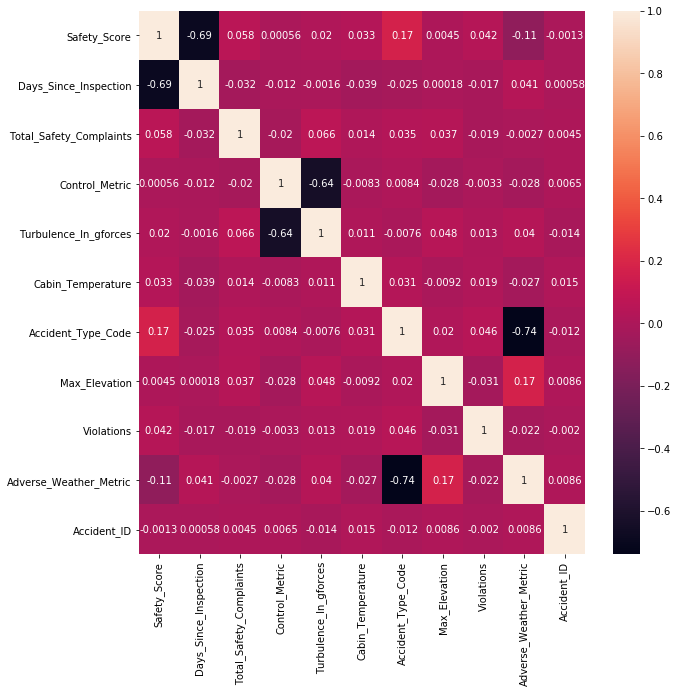

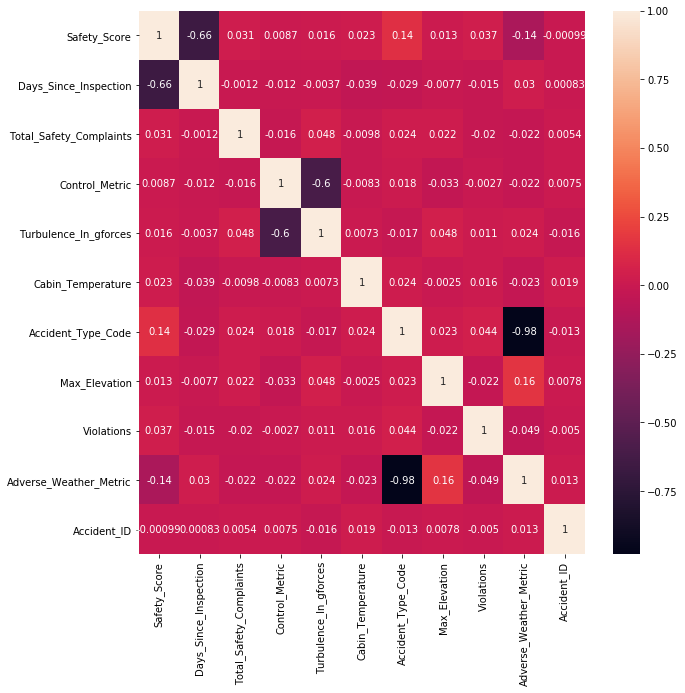

In [0]:
corr = dataset.corr(method = 'kendall')
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr,annot=True)

corr = dataset.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr,annot=True)

corr = dataset.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr,annot=True)


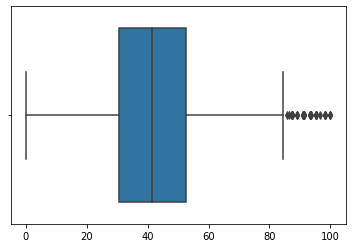

In [0]:
dataset[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Accident_Type_Code','Max_Elevation',	'Violations',	'Adverse_Weather_Metric']]
sns.boxplot(x=dataset[['Safety_Score']])


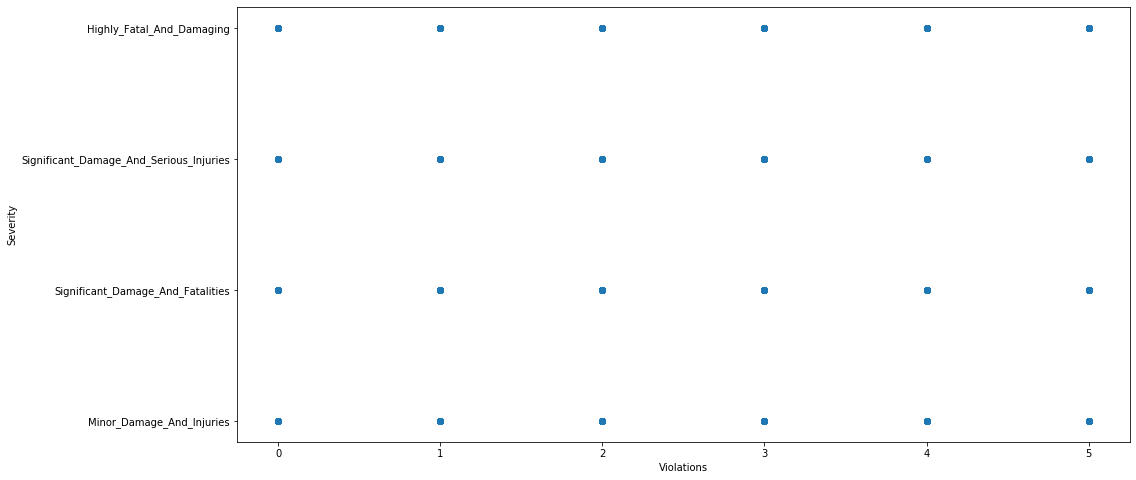

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dataset['Violations'], dataset['Severity'])
ax.set_xlabel('Violations')
ax.set_ylabel('Severity')
plt.show()

In [0]:
sns.pairplot(dataset, hue = 'Severity', palette = 'hls')

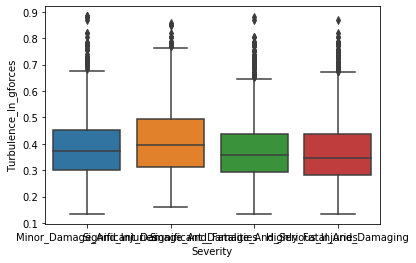

In [0]:
sns.boxplot(data=dataset, x= 'Severity', y = 'Turbulence_In_gforces')

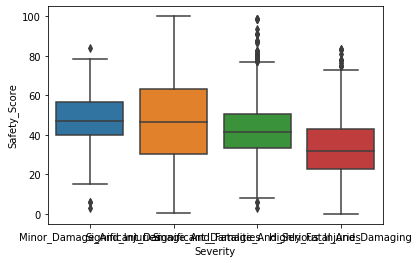

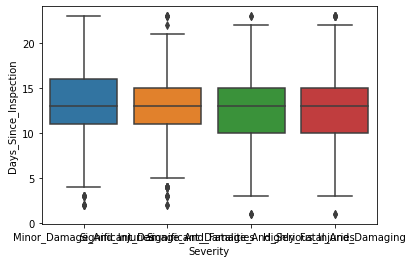

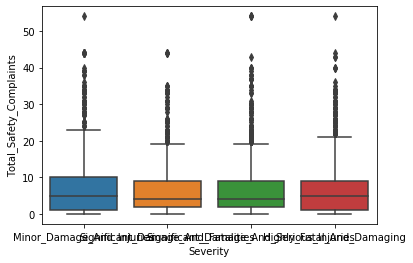

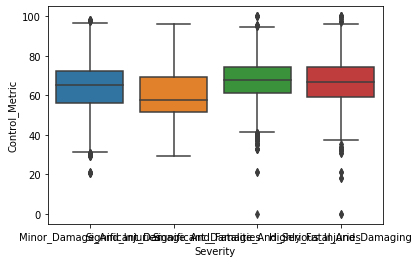

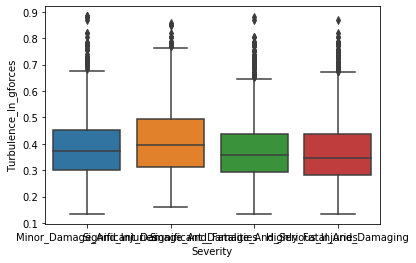

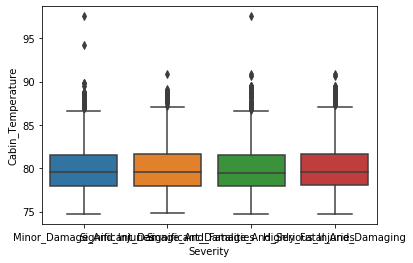

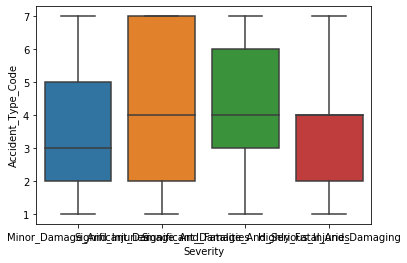

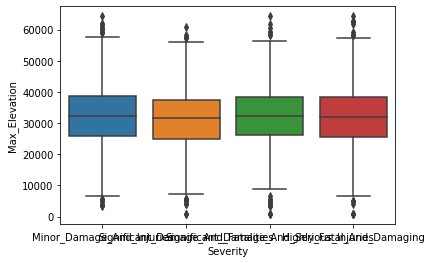

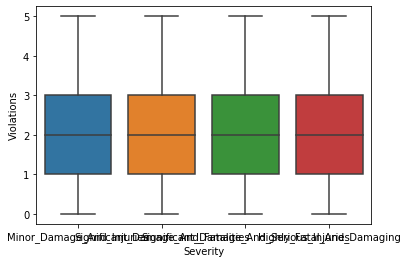

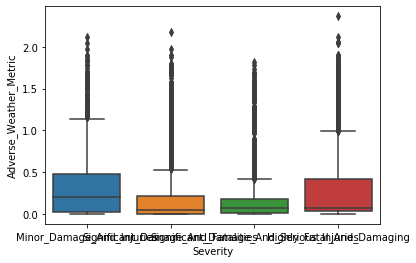

In [0]:
feature_names = dataset.columns
for i in range(1,len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='Severity', y=feature_names[i], data=dataset)

In [0]:
dataset.shape

(10000, 12)

##Z_score outliers

In [0]:
from scipy import stats
z = np.abs(stats.zscore(X))
print(z)
threshold = 4
print(np.where(z > 4))

[[0.45530256 0.30198105 2.2140724  ... 0.07064887 0.94987305 0.44270091]
 [1.2758883  0.82808182 2.93126449 ... 0.6337356  0.01173158 0.25377304]
 [1.31267317 0.01946533 1.35344189 ... 0.77052775 0.94987305 0.66193896]
 ...
 [0.86895304 1.1495282  0.79813439 ... 0.18768898 0.94987305 0.22949275]
 [0.88823228 1.39311325 0.94157281 ... 0.82898759 0.01173158 0.60154411]
 [0.50340586 0.01946533 0.51125756 ... 0.63579126 0.01173158 0.62606475]]
(array([   8,   58,  106,  183,  345,  450,  548,  572,  635,  680,  786,
        851,  886,  893,  905,  969,  999, 1068, 1107, 1163, 1238, 1241,
       1311, 1675, 1980, 2068, 2155, 2155, 2162, 2349, 2379, 2496, 2517,
       2579, 2617, 2649, 2676, 2800, 3004, 3213, 3249, 3272, 3502, 3701,
       3720, 3834, 3934, 3976, 4009, 4242, 4426, 4431, 4505, 4538, 4580,
       4612, 4661, 4666, 4766, 4940, 4952, 4966, 5129, 5172, 5346, 5837,
       5856, 5910, 5952, 5973, 6106, 6258, 6282, 6340, 6384, 6386, 6429,
       6498, 6512, 6542, 6618, 6634, 6681, 6

In [0]:
dataset_o = dataset[(z < 5).all(axis=1)]
dataset_o.shape
print(dataset_o.head)

<bound method NDFrame.head of                                      Severity  ...  Accident_ID
0                   Minor_Damage_And_Injuries  ...         7570
1                   Minor_Damage_And_Injuries  ...        12128
2           Significant_Damage_And_Fatalities  ...         2181
3     Significant_Damage_And_Serious_Injuries  ...         5946
4           Significant_Damage_And_Fatalities  ...         9054
...                                       ...  ...          ...
9995  Significant_Damage_And_Serious_Injuries  ...        11493
9996                Highly_Fatal_And_Damaging  ...          305
9997  Significant_Damage_And_Serious_Injuries  ...          612
9998                Minor_Damage_And_Injuries  ...         4963
9999                Highly_Fatal_And_Damaging  ...         9387

[9968 rows x 12 columns]>


In [0]:
X_tr_o, X_tst_o, y_tr_o, y_tst_o = train_test_split(dataset_o[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Accident_Type_Code','Max_Elevation',	'Violations',	'Adverse_Weather_Metric']], dataset_o['Severity'], test_size=0.1)

In [0]:
print(y_tr_o.unique())
y_tr_o[y_tr_o=='Minor_Damage_And_Injuries'].count()

['Highly_Fatal_And_Damaging' 'Minor_Damage_And_Injuries'
 'Significant_Damage_And_Fatalities'
 'Significant_Damage_And_Serious_Injuries']


2252

In [0]:
# test_size = 0.2 0.3 - 0.9565
# test_size - 0.1 # learning rate: 0.9    Accuracy: 0.971     F1 Score:0.9709998840168548
# test_size - 0.05 learning rate: 0.7    Accuracy: 0.96     F1 Score:0.9598699440788372
# test_size - 0.15 learning rate: 0.6    Accuracy: 0.952     F1 Score:0.9519948655531886
,
for learning_rate in [0.01,0.03,0.05,0.1,0.3,0.33,0.36,0.4,0.43,0.46,0.5,0.55,0.6,0.62,0.65,0.68,0.7,0.8,0.85,0.86,0.9,1,2,3] :
# learning_rate = 0.9
  clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                      learning_rate=learning_rate,n_estimators=50,
                      max_depth=5, min_child_weigth = 5,gamma=0,subsample=0.9, colsample_bytree = 0.7,scale_pos_weight = 1,seed = 27)
      
  model = clf.fit(X_tr_o, y_tr_o)
  predicted_o= model.predict(X_tst_o)
  print('Test set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tst_o, predicted_o)) + "     F1 Score:"+ str(metrics.f1_score(y_tst_o, predicted_o,average='weighted')) )
  predicted_o_tr= model.predict(X_tr_o)
  print('Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tr_o, predicted_o_tr)) + "     F1 Score:"+ str(metrics.f1_score(y_tr_o, predicted_o_tr,average='weighted')) )


Test setlearning rate: 0.01    Accuracy: 0.7743229689067201     F1 Score:0.7741647050870838
Training setlearning rate: 0.01    Accuracy: 0.8023631702151377     F1 Score:0.8021370871516977
Test setlearning rate: 0.03    Accuracy: 0.8034102306920762     F1 Score:0.8036437146537239
Training setlearning rate: 0.03    Accuracy: 0.8418236539962101     F1 Score:0.8418219208314367
Test setlearning rate: 0.05    Accuracy: 0.8465396188565697     F1 Score:0.8468957256103959
Training setlearning rate: 0.05    Accuracy: 0.8795006130866124     F1 Score:0.8798421542780182
Test setlearning rate: 0.1    Accuracy: 0.8976930792377131     F1 Score:0.8979550651558043
Training setlearning rate: 0.1    Accuracy: 0.9352357596700479     F1 Score:0.935386780176508
Test setlearning rate: 0.3    Accuracy: 0.9418254764292878     F1 Score:0.9418350877819195
Training setlearning rate: 0.3    Accuracy: 0.9865120945268087     F1 Score:0.9865128496234469
Test setlearning rate: 0.33    Accuracy: 0.9468405215646941     F

In [0]:
# z=4
# Test setlearning rate: 0.9    Accuracy: 0.9757085020242915     F1 Score:0.9756927602349297
# Training setlearning rate: 0.9    Accuracy: 1.0     F1 Score:1.0



In [0]:
learning_rate=0.62
clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                    learning_rate=learning_rate,n_estimators=50,
                    max_depth=5, min_child_weigth = 5,gamma=0,subsample=0.9, colsample_bytree = 0.7,scale_pos_weight = 1,seed = 27)
    
model = clf.fit(X_tr_o, y_tr_o)
predicted_o= model.predict(X_tst_o)
print('Test set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tst_o, predicted_o)) + "     F1 Score:"+ str(metrics.f1_score(y_tst_o, predicted_o,average='weighted')) )
predicted_o_tr= model.predict(X_tr_o)
print('Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tr_o, predicted_o_tr)) + "     F1 Score:"+ str(metrics.f1_score(y_tr_o, predicted_o_tr,average='weighted')) )


Test setlearning rate: 0.62    Accuracy: 0.958876629889669     F1 Score:0.9589019310212251
Training setlearning rate: 0.62    Accuracy: 0.9988852970683313     F1 Score:0.998885273662578


In [0]:
#To evaluate the model's predictions
report = classification_report(y_tst_o, predicted_o)
print(report)
matrix = confusion_matrix(y_tst_o, predicted_o)
print(matrix)

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.94      0.95      0.95       286
              Minor_Damage_And_Injuries       0.95      0.97      0.96       262
      Significant_Damage_And_Fatalities       0.97      0.96      0.96       179
Significant_Damage_And_Serious_Injuries       0.97      0.96      0.97       270

                               accuracy                           0.96       997
                              macro avg       0.96      0.96      0.96       997
                           weighted avg       0.96      0.96      0.96       997

[[272   7   4   3]
 [  5 253   1   3]
 [  4   3 171   1]
 [  7   2   1 260]]


In [0]:
test_dataset = pd.read_csv('./test.csv')

In [0]:
print(test_dataset.head())
test_dataset_X = test_dataset[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Accident_Type_Code','Max_Elevation',	'Violations',	'Adverse_Weather_Metric']]
print((test_dataset_X))

   Safety_Score  Days_Since_Inspection  ...  Adverse_Weather_Metric  Accident_ID
0     19.497717                     16  ...                0.069692            1
1     58.173516                     15  ...                0.002777           10
2     33.287671                     15  ...                0.004316           14
3      3.287671                     21  ...                0.199990           17
4     10.867580                     18  ...                0.483696           21

[5 rows x 11 columns]
      Safety_Score  Days_Since_Inspection  ...  Violations  Adverse_Weather_Metric
0        19.497717                     16  ...           2                0.069692
1        58.173516                     15  ...           2                0.002777
2        33.287671                     15  ...           1                0.004316
3         3.287671                     21  ...           2                0.199990
4        10.867580                     18  ...           2                0.

In [0]:
test_predict = clf.predict(test_dataset_X)
y_submission = pd.concat([test_dataset[['Accident_ID']],pd.DataFrame(test_predict,columns=['Severity'])], axis=1, sort=False)
print(y_submission)


      Accident_ID                                 Severity
0               1                Highly_Fatal_And_Damaging
1              10        Significant_Damage_And_Fatalities
2              14  Significant_Damage_And_Serious_Injuries
3              17                Highly_Fatal_And_Damaging
4              21                Highly_Fatal_And_Damaging
...           ...                                      ...
2495        12484                Highly_Fatal_And_Damaging
2496        12487  Significant_Damage_And_Serious_Injuries
2497        12488  Significant_Damage_And_Serious_Injuries
2498        12491  Significant_Damage_And_Serious_Injuries
2499        12493                Highly_Fatal_And_Damaging

[2500 rows x 2 columns]


In [0]:
y_submission.to_csv('./y_submission_xg_boost_17_o.csv',index=False)
# score_not_normalize - 85.33359
# score_normalize - 84.22388
pickle.dump(clf, open('./weights_xg_boost_17_o.sav', 'wb'))

##IQR_score outlier

In [0]:
Q1 = dataset.quantile(0.15)
Q3 = dataset.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

Safety_Score                  33.789954
Days_Since_Inspection          8.000000
Total_Safety_Complaints       12.000000
Control_Metric                24.156791
Turbulence_In_gforces          0.243419
Cabin_Temperature              5.480000
Accident_Type_Code             4.000000
Max_Elevation              19554.912728
Violations                     2.000000
Adverse_Weather_Metric         0.545754
Accident_ID                 8757.300000
dtype: float64


In [0]:
print(dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))

      Accident_ID  Accident_Type_Code  ...  Turbulence_In_gforces  Violations
0           False               False  ...                  False       False
1           False               False  ...                  False       False
2           False               False  ...                  False       False
3           False               False  ...                  False       False
4           False               False  ...                  False       False
...           ...                 ...  ...                    ...         ...
9995        False               False  ...                  False       False
9996        False               False  ...                  False       False
9997        False               False  ...                  False       False
9998        False               False  ...                  False       False
9999        False               False  ...                  False       False

[10000 rows x 12 columns]


TypeError: ignored

In [0]:
dataset_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_out.shape

(9599, 12)

In [0]:
X_tr_out, X_tst_out, y_tr_out, y_tst_out = train_test_split(dataset_out[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Accident_Type_Code','Max_Elevation','Violations','Adverse_Weather_Metric']], dataset_out['Severity'], test_size=0.1)

In [0]:
# test_size = 0.2 0.3 - 0.9565
# test_size - 0.1 # learning rate: 0.9    Accuracy: 0.971     F1 Score:0.9709998840168548
# test_size - 0.05 learning rate: 0.7    Accuracy: 0.96     F1 Score:0.9598699440788372
# test_size - 0.15 learning rate: 0.6    Accuracy: 0.952     F1 Score:0.9519948655531886
,
for learning_rate in [0.01,0.03,0.05,0.1,0.3,0.33,0.36,0.4,0.43,0.46,0.5,0.55,0.6,0.62,0.65,0.68,0.7,0.8,0.85,0.86,0.9,1,2,3] :
# learning_rate = 0.9
  clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                      learning_rate=learning_rate,n_estimators=50,
                      max_depth=5, min_child_weigth = 5,gamma=0,subsample=0.9, colsample_bytree = 0.7,scale_pos_weight = 1,seed = 27)
      
  model = clf.fit(X_tr_out, y_tr_out)
  predicted_o= model.predict(X_tst_out)
  print('Test set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tst_out, predicted_o)) + "     F1 Score:"+ str(metrics.f1_score(y_tst_out, predicted_o,average='weighted')) )
  predicted_o_tr= model.predict(X_tr_out)
  print('Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tr_out, predicted_o_tr)) + "     F1 Score:"+ str(metrics.f1_score(y_tr_out, predicted_o_tr,average='weighted')) )


Test setlearning rate: 0.01    Accuracy: 0.784375     F1 Score:0.7847845629083496
Training setlearning rate: 0.01    Accuracy: 0.7909480263919435     F1 Score:0.7912039919898561
Test setlearning rate: 0.03    Accuracy: 0.8114583333333333     F1 Score:0.8116635800577001
Training setlearning rate: 0.03    Accuracy: 0.8352818613265425     F1 Score:0.835304916192764
Test setlearning rate: 0.05    Accuracy: 0.8552083333333333     F1 Score:0.8553514036629338
Training setlearning rate: 0.05    Accuracy: 0.8801944669521935     F1 Score:0.8800687046172111
Test setlearning rate: 0.1    Accuracy: 0.9125     F1 Score:0.9127736199740194
Training setlearning rate: 0.1    Accuracy: 0.9421229308947795     F1 Score:0.9421787508740492
Test setlearning rate: 0.3    Accuracy: 0.9625     F1 Score:0.962457708218511
Training setlearning rate: 0.3    Accuracy: 0.9886560944553768     F1 Score:0.9886518585783665
Test setlearning rate: 0.33    Accuracy: 0.9552083333333333     F1 Score:0.9551792883383358
Training

In [0]:
learning_rate=0.46
clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                    learning_rate=learning_rate,n_estimators=50,
                    max_depth=5, min_child_weigth = 5,gamma=0,subsample=0.9, colsample_bytree = 0.7,scale_pos_weight = 1,seed = 27)
    
model = clf.fit(X_tr_o, y_tr_o)
predicted_o= model.predict(X_tst_o)
print('Test set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tst_o, predicted_o)) + "     F1 Score:"+ str(metrics.f1_score(y_tst_o, predicted_o,average='weighted')) )
predicted_o_tr= model.predict(X_tr_o)
print('Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tr_o, predicted_o_tr)) + "     F1 Score:"+ str(metrics.f1_score(y_tr_o, predicted_o_tr,average='weighted')) )


Test setlearning rate: 0.46    Accuracy: 0.9518555667001003     F1 Score:0.9519109768879948
Training setlearning rate: 0.46    Accuracy: 0.9949838368074908     F1 Score:0.9949840157350412


In [0]:
#To evaluate the model's predictions
report = classification_report(y_tst_o, predicted_o)
print(report)
matrix = confusion_matrix(y_tst_o, predicted_o)
print(matrix)

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.94      0.94      0.94       286
              Minor_Damage_And_Injuries       0.94      0.96      0.95       262
      Significant_Damage_And_Fatalities       0.98      0.96      0.97       179
Significant_Damage_And_Serious_Injuries       0.96      0.95      0.96       270

                               accuracy                           0.95       997
                              macro avg       0.95      0.95      0.95       997
                           weighted avg       0.95      0.95      0.95       997

[[270   9   3   4]
 [  7 251   1   3]
 [  2   3 171   3]
 [  8   5   0 257]]


In [0]:
test_dataset = pd.read_csv('./test.csv')

In [0]:

print(test_dataset.head())
test_dataset_X = test_dataset[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Accident_Type_Code','Max_Elevation',	'Violations',	'Adverse_Weather_Metric']]
print((test_dataset_X))

   Safety_Score  Days_Since_Inspection  ...  Adverse_Weather_Metric  Accident_ID
0     19.497717                     16  ...                0.069692            1
1     58.173516                     15  ...                0.002777           10
2     33.287671                     15  ...                0.004316           14
3      3.287671                     21  ...                0.199990           17
4     10.867580                     18  ...                0.483696           21

[5 rows x 11 columns]
      Safety_Score  Days_Since_Inspection  ...  Violations  Adverse_Weather_Metric
0        19.497717                     16  ...           2                0.069692
1        58.173516                     15  ...           2                0.002777
2        33.287671                     15  ...           1                0.004316
3         3.287671                     21  ...           2                0.199990
4        10.867580                     18  ...           2                0.

In [0]:
test_predict = clf.predict(test_dataset_X)
y_submission = pd.concat([test_dataset[['Accident_ID']],pd.DataFrame(test_predict,columns=['Severity'])], axis=1, sort=False)
print(y_submission)


      Accident_ID                                 Severity
0               1                Highly_Fatal_And_Damaging
1              10        Significant_Damage_And_Fatalities
2              14  Significant_Damage_And_Serious_Injuries
3              17                Highly_Fatal_And_Damaging
4              21        Significant_Damage_And_Fatalities
...           ...                                      ...
2495        12484                Highly_Fatal_And_Damaging
2496        12487  Significant_Damage_And_Serious_Injuries
2497        12488  Significant_Damage_And_Serious_Injuries
2498        12491  Significant_Damage_And_Serious_Injuries
2499        12493                Highly_Fatal_And_Damaging

[2500 rows x 2 columns]


In [0]:
y_submission.to_csv('./y_submission_xg_boost_18_o.csv',index=False)
# score_not_normalize - 85.33359
# score_normalize - 84.22388
pickle.dump(clf, open('./weights_xg_boost_18_o.sav', 'wb'))

# Oversamplng the data

In [0]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
smote =SMOTE('minority',random_state = seed)
X_sm, y_sm = smote.fit_sample(X_tr,y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
print(X_sm.shape, y_sm.shape)
y_sm_pd = pd.DataFrame({'Severity': y_sm[:]})
X_sm_pd = pd.DataFrame({'Safety_Score': X_sm[:,0],'Days_Since_Inspection': X_sm[:,1],'Total_Safety_Complaints': X_sm[:,2],'Control_Metric': X_sm[:,3],'Turbulence_In_gforces': X_sm[:,4],'Cabin_Temperature': X_sm[:,5],'Accident_Type_Code': X_sm[:,6],'Max_Elevation': X_sm[:,7],	'Violations': X_sm[:,8],	'Adverse_Weather_Metric': X_sm[:,9]})
count = y_sm_pd['Severity'].value_counts() 
print(count)

(9213, 10) (9213,)
Significant_Damage_And_Fatalities          2469
Highly_Fatal_And_Damaging                  2469
Significant_Damage_And_Serious_Injuries    2227
Minor_Damage_And_Injuries                  2048
Name: Severity, dtype: int64


In [0]:
list1 = []
list2 = []
dict1 = {}
dict2 = {}
for seed in range (1,100) :
  X_tr, X_tst, y_tr, y_tst = train_test_split(X, y['Severity'], test_size=0.1,random_state = seed)

  smote =SMOTE('minority',random_state = seed)
  X_sm, y_sm = smote.fit_sample(X_tr,y_tr)
  X_tr, X_cross, y_tr, y_cross = train_test_split(X_tr, y_tr, test_size=0.1,random_state = seed)

  smote =SMOTE('minority',random_state = seed)
  X_sm, y_sm = smote.fit_sample(X_tr,y_tr)
  y_sm_pd = pd.DataFrame({'Severity': y_sm[:]})
  X_sm_pd = pd.DataFrame({'Safety_Score': X_sm[:,0],'Days_Since_Inspection': X_sm[:,1],'Total_Safety_Complaints': X_sm[:,2],'Control_Metric': X_sm[:,3],'Turbulence_In_gforces': X_sm[:,4],'Cabin_Temperature': X_sm[:,5],'Accident_Type_Code': X_sm[:,6],'Max_Elevation': X_sm[:,7],	'Violations': X_sm[:,8],	'Adverse_Weather_Metric': X_sm[:,9]})
  for learning_rate in [0.01,0.03,0.05,0.1,0.3,0.33,0.36,0.4,0.43,0.46,0.5,0.55,0.6,0.62,0.65,0.68,0.7,0.8,0.85,0.86,0.9,1,2,3] :
  # learning_rate = 0.33
    clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                        learning_rate=learning_rate,n_estimators=150,
                        max_depth=5, min_child_weigth = 1,gamma=0,subsample=0.8, colsample_bytree = 0.8,scale_pos_weight = 1,seed = seed)
        
    model = clf.fit(X_sm_pd, y_sm_pd['Severity'])
    # predicted= m/odel.predict(X_cross)
    # print('Seed: ' + str(seed) + ' Cross set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_cross, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_cross, predicted,average='weighted')) )
    # predicted= model.predict(X_sm_pd)
    # print('Seed: ' + str(seed) + ' Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_sm_pd, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_sm_pd, predicted,average='weighted'))+"\n" )

    predicted= model.predict(X_cross)
    dict1[learning_rate]= metrics.accuracy_score(y_cross, predicted)
    predicted= model.predict(X_cross)
    dict2[learning_rate] = metrics.f1_score(y_cross, predicted,average='weighted')
    
  print(seed)
  list1.append(tuple((seed,max(dict1, key=dict1.get),dict1[max(dict1, key=dict1.get)])))
  list2.append(tuple((seed,max(dict2, key=dict2.get),dict2[max(dict2, key=dict2.get)])))
    

In [0]:
print(list1)
print(list2)

[(1, 0.33, 0.9611111111111111), (2, 0.6, 0.9633333333333334), (3, 0.4, 0.9611111111111111), (4, 0.3, 0.9633333333333334), (5, 0.46, 0.9577777777777777), (6, 0.6, 0.9644444444444444), (7, 0.33, 0.9577777777777777), (8, 0.33, 0.9622222222222222), (9, 0.3, 0.9733333333333334), (10, 0.65, 0.9522222222222222), (11, 0.5, 0.9644444444444444), (12, 0.4, 0.97), (13, 0.55, 0.9611111111111111), (14, 0.33, 0.9655555555555555), (15, 0.6, 0.9644444444444444), (16, 0.62, 0.96), (17, 0.33, 0.9755555555555555), (18, 0.36, 0.9577777777777777), (19, 0.46, 0.9577777777777777), (20, 0.55, 0.9655555555555555), (21, 0.33, 0.9677777777777777), (22, 0.46, 0.9644444444444444), (23, 0.43, 0.9622222222222222), (24, 0.65, 0.9588888888888889), (25, 0.65, 0.9666666666666667), (26, 0.36, 0.9511111111111111), (27, 0.36, 0.9533333333333334), (28, 0.3, 0.9544444444444444), (29, 0.85, 0.9577777777777777), (30, 0.3, 0.97), (31, 0.33, 0.9655555555555555), (32, 0.36, 0.9533333333333334), (33, 0.33, 0.9611111111111111), (34,

In [0]:
predicted= model.predict(X_tst)
print('Test set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted'))+"\n" )

Test setlearning rate: 0.33    Accuracy: 0.965     F1 Score:0.9650587660080212



In [0]:
print(list1)
print(list2)

[(1, 0.33, 0.9611111111111111), (2, 0.6, 0.9633333333333334), (3, 0.4, 0.9611111111111111), (4, 0.3, 0.9633333333333334), (5, 0.46, 0.9577777777777777), (6, 0.6, 0.9644444444444444), (7, 0.33, 0.9577777777777777), (8, 0.33, 0.9622222222222222), (9, 0.3, 0.9733333333333334), (10, 0.65, 0.9522222222222222), (11, 0.5, 0.9644444444444444), (12, 0.4, 0.97), (13, 0.55, 0.9611111111111111), (14, 0.33, 0.9655555555555555), (15, 0.6, 0.9644444444444444), (16, 0.62, 0.96), (17, 0.33, 0.9755555555555555), (18, 0.36, 0.9577777777777777), (19, 0.46, 0.9577777777777777), (20, 0.55, 0.9655555555555555), (21, 0.33, 0.9677777777777777), (22, 0.46, 0.9644444444444444), (23, 0.43, 0.9622222222222222), (24, 0.65, 0.9588888888888889), (25, 0.65, 0.9666666666666667), (26, 0.36, 0.9511111111111111), (27, 0.36, 0.9533333333333334), (28, 0.3, 0.9544444444444444), (29, 0.85, 0.9577777777777777), (30, 0.3, 0.97), (31, 0.33, 0.9655555555555555), (32, 0.36, 0.9533333333333334), (33, 0.33, 0.9611111111111111), (34,

In [0]:
from sklearn.utils import class_weight

In [0]:
y_tr_np = y_tr.values
class_weight = class_weight.compute_class_weight('balanced',np.unique(y_tr_np),y_tr_np)

In [0]:
for learning_rate in [0.01,0.03,0.05,0.1,0.3,0.33,0.36,0.4,0.43,0.46,0.5,0.55,0.6,0.62,0.65,0.68,0.7,0.8,0.85,0.86,0.9,1,2,3] :
# learning_rate = 0.9
  clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                      learning_rate=learning_rate,n_estimators=150,
                      max_depth=5, min_child_weigth = 1,gamma=0,subsample=0.8, colsample_bytree = 0.8,seed = seed,scale_pos_weight = class_weight)
      
  model = clf.fit(X_tr, y_tr)
  predicted= model.predict(X_cross)
  print('Cross set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_cross, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_cross, predicted,average='weighted')) )
  predicted= model.predict(X_tr)
  print('Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tr, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tr, predicted,average='weighted'))+"\n" )

In [0]:
seed = 63
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y['Severity'], test_size=0.1,random_state = seed)

smote =SMOTE('minority',random_state = seed)
X_sm, y_sm = smote.fit_sample(X_tr,y_tr)
X_tr, X_cross, y_tr, y_cross = train_test_split(X_tr, y_tr, test_size=0.1,random_state = seed)

smote =SMOTE('minority',random_state = seed)
X_sm, y_sm = smote.fit_sample(X_tr,y_tr)
y_sm_pd = pd.DataFrame({'Severity': y_sm[:]})
X_sm_pd = pd.DataFrame({'Safety_Score': X_sm[:,0],'Days_Since_Inspection': X_sm[:,1],'Total_Safety_Complaints': X_sm[:,2],'Control_Metric': X_sm[:,3],'Turbulence_In_gforces': X_sm[:,4],'Cabin_Temperature': X_sm[:,5],'Accident_Type_Code': X_sm[:,6],'Max_Elevation': X_sm[:,7],	'Violations': X_sm[:,8],	'Adverse_Weather_Metric': X_sm[:,9]})
  # for learning_rate in [0.01,0.03,0.05,0.1,0.3,0.33,0.36,0.4,0.43,0.46,0.5,0.55,0.6,0.62,0.65,0.68,0.7,0.8,0.85,0.86,0.9,1,2,3] :
learning_rate = 0.4
clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                    learning_rate=learning_rate,n_estimators=150,
                    max_depth=5, min_child_weigth = 1,gamma=0,subsample=0.8, colsample_bytree = 0.8,scale_pos_weight = 1,seed = seed)
    
model = clf.fit(X_sm_pd, y_sm_pd['Severity'])
predicted= model.predict(X_cross)
print('Seed: ' + str(seed) + ' Cross set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_cross, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_cross, predicted,average='weighted')) )
predicted= model.predict(X_sm_pd)
print('Seed: ' + str(seed) + ' Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_sm_pd, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_sm_pd, predicted,average='weighted'))+"\n" )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Seed: 63 Cross setlearning rate: 0.4    Accuracy: 0.9766666666666667     F1 Score:0.9766433223289793
Seed: 63 Training setlearning rate: 0.4    Accuracy: 1.0     F1 Score:1.0



In [0]:
predicted= model.predict(X_tst)
print('Test set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted'))+"\n" )

Test setlearning rate: 0.4    Accuracy: 0.96     F1 Score:0.9599755556598748



# Oversampling data after correlation

In [0]:
list3 = []
list4 = []
dict3 = {}
dict4 = {}
for seed in range (1,100) :
  X_tr, X_tst, y_tr, y_tst = train_test_split(dataset[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Max_Elevation',	'Violations',	'Adverse_Weather_Metric']], y['Severity'], test_size=0.1,random_state = seed)
  smote =SMOTE('minority',random_state = seed)
  X_sm, y_sm = smote.fit_sample(X_tr,y_tr)
  X_tr, X_cross, y_tr, y_cross = train_test_split(X_tr, y_tr, test_size=0.1,random_state = seed)

  smote =SMOTE('minority',random_state = seed)
  X_sm, y_sm = smote.fit_sample(X_tr,y_tr)
  y_sm_pd = pd.DataFrame({'Severity': y_sm[:]})
  X_sm_pd = pd.DataFrame({'Safety_Score': X_sm[:,0],'Days_Since_Inspection': X_sm[:,1],'Total_Safety_Complaints': X_sm[:,2],'Control_Metric': X_sm[:,3],'Turbulence_In_gforces': X_sm[:,4],'Cabin_Temperature': X_sm[:,5],'Max_Elevation': X_sm[:,6],	'Violations': X_sm[:,7],	'Adverse_Weather_Metric': X_sm[:,8]})
  for learning_rate in [0.01,0.03,0.05,0.1,0.3,0.33,0.36,0.4,0.43,0.46,0.5,0.55,0.6,0.62,0.65,0.68,0.7,0.8,0.85,0.86,0.9,1,2,3] :
  # for learning_rate in [0.01,0.03,0.05,3] :

  # learning_rate = 0.33
    clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                        learning_rate=learning_rate,n_estimators=150,
                        max_depth=5, min_child_weigth = 1,gamma=0,subsample=0.8, colsample_bytree = 0.8,scale_pos_weight = 1,seed = seed)
        
    model = clf.fit(X_sm_pd, y_sm_pd['Severity'])
    # predicted= model.predict(X_cross)
    # print('Seed: ' + str(seed) + ' Cross set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_cross, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_cross, predicted,average='weighted')) )
    # predicted= model.predict(X_sm_pd)
    # print('Seed: ' + str(seed) + ' Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_sm_pd, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_sm_pd, predicted,average='weighted'))+"\n" )

    predicted= model.predict(X_cross)
    dict3[learning_rate]= metrics.accuracy_score(y_cross, predicted)
    predicted= model.predict(X_cross)
    dict4[learning_rate] = metrics.f1_score(y_cross, predicted,average='weighted')
    
  print(seed)
  list3.append(tuple((seed,max(dict3, key=dict3.get),dict3[max(dict3, key=dict3.get)])))
  list4.append(tuple((seed,max(dict4, key=dict4.get),dict4[max(dict4, key=dict4.get)])))
    

In [0]:
print(list3)
print(list4)

[(1, 0.43, 0.96), (2, 0.3, 0.9622222222222222), (3, 0.4, 0.9644444444444444), (4, 0.33, 0.96), (5, 0.65, 0.9577777777777777), (6, 0.46, 0.9655555555555555), (7, 0.4, 0.9622222222222222), (8, 0.43, 0.9622222222222222), (9, 0.4, 0.9666666666666667), (10, 0.33, 0.9488888888888889), (11, 0.85, 0.9666666666666667), (12, 0.43, 0.9688888888888889), (13, 0.55, 0.9611111111111111), (14, 0.3, 0.9622222222222222), (15, 0.62, 0.9622222222222222), (16, 0.3, 0.9588888888888889), (17, 0.85, 0.9744444444444444), (18, 0.3, 0.9511111111111111), (19, 0.46, 0.9544444444444444), (20, 0.3, 0.9666666666666667), (21, 0.4, 0.9655555555555555), (22, 0.6, 0.96), (23, 0.55, 0.9611111111111111), (24, 0.3, 0.9555555555555556), (25, 0.33, 0.9655555555555555), (26, 0.8, 0.9488888888888889), (27, 0.33, 0.9555555555555556), (28, 0.65, 0.9544444444444444), (29, 0.36, 0.9588888888888889), (30, 0.33, 0.9666666666666667), (31, 0.85, 0.9644444444444444), (32, 0.43, 0.9544444444444444), (33, 0.46, 0.9611111111111111), (34, 0

In [0]:
print(max(list3)[1])

0.3


In [0]:
print(sorted(list3,key=lambda x: x[2], reverse=True)[0])
print(sorted(list4,key=lambda x: x[2], reverse=True)[0])

(61, 0.5, 0.9755555555555555)
(61, 0.5, 0.9756157666416837)


In [0]:
list1 = [(1, 0.33, 0.9611111111111111), (2, 0.6, 0.9633333333333334), (3, 0.4, 0.9611111111111111), (4, 0.3, 0.9633333333333334), (5, 0.46, 0.9577777777777777), (6, 0.6, 0.9644444444444444), (7, 0.33, 0.9577777777777777), (8, 0.33, 0.9622222222222222), (9, 0.3, 0.9733333333333334), (10, 0.65, 0.9522222222222222), (11, 0.5, 0.9644444444444444), (12, 0.4, 0.97), (13, 0.55, 0.9611111111111111), (14, 0.33, 0.9655555555555555), (15, 0.6, 0.9644444444444444), (16, 0.62, 0.96), (17, 0.33, 0.9755555555555555), (18, 0.36, 0.9577777777777777), (19, 0.46, 0.9577777777777777), (20, 0.55, 0.9655555555555555), (21, 0.33, 0.9677777777777777), (22, 0.46, 0.9644444444444444), (23, 0.43, 0.9622222222222222), (24, 0.65, 0.9588888888888889), (25, 0.65, 0.9666666666666667), (26, 0.36, 0.9511111111111111), (27, 0.36, 0.9533333333333334), (28, 0.3, 0.9544444444444444), (29, 0.85, 0.9577777777777777), (30, 0.3, 0.97), (31, 0.33, 0.9655555555555555), (32, 0.36, 0.9533333333333334), (33, 0.33, 0.9611111111111111), (34, 0.46, 0.9688888888888889), (35, 0.5, 0.9666666666666667), (36, 0.5, 0.9711111111111111), (37, 0.33, 0.9655555555555555), (38, 0.3, 0.9644444444444444), (39, 0.4, 0.9733333333333334), (40, 0.43, 0.9666666666666667), (41, 0.62, 0.9688888888888889), (42, 0.4, 0.96), (43, 0.7, 0.9655555555555555), (44, 0.3, 0.96), (45, 0.62, 0.9577777777777777), (46, 0.46, 0.9677777777777777), (47, 0.33, 0.9633333333333334), (48, 0.36, 0.9577777777777777), (49, 0.68, 0.9522222222222222), (50, 0.68, 0.9622222222222222), (51, 0.8, 0.9655555555555555), (52, 0.5, 0.9688888888888889), (53, 0.3, 0.9677777777777777), (54, 0.36, 0.9733333333333334), (55, 0.33, 0.9588888888888889), (56, 0.65, 0.9655555555555555), (57, 0.3, 0.9622222222222222), (58, 0.33, 0.9622222222222222), (59, 0.85, 0.9511111111111111), (60, 0.33, 0.9622222222222222), (61, 0.55, 0.9733333333333334), (62, 0.33, 0.9566666666666667), (63, 0.4, 0.9766666666666667), (64, 0.36, 0.9644444444444444), (65, 0.9, 0.9633333333333334), (66, 0.3, 0.9644444444444444), (67, 0.55, 0.9622222222222222), (68, 0.46, 0.9533333333333334), (69, 0.4, 0.9533333333333334), (70, 0.33, 0.9666666666666667), (71, 0.5, 0.9677777777777777), (72, 0.62, 0.96), (73, 0.6, 0.9655555555555555), (74, 0.4, 0.97), (75, 0.46, 0.96), (76, 0.3, 0.9688888888888889), (77, 0.85, 0.9611111111111111), (78, 0.65, 0.9644444444444444), (79, 0.43, 0.9666666666666667), (80, 0.46, 0.9655555555555555), (81, 0.6, 0.9555555555555556), (82, 0.8, 0.9722222222222222), (83, 0.6, 0.9611111111111111), (84, 0.6, 0.9588888888888889), (85, 0.36, 0.96), (86, 0.36, 0.9733333333333334), (87, 0.8, 0.9644444444444444), (88, 0.5, 0.9588888888888889), (89, 0.46, 0.9544444444444444), (90, 0.4, 0.9644444444444444), (91, 0.36, 0.9688888888888889), (92, 0.43, 0.9666666666666667), (93, 0.4, 0.9666666666666667), (94, 0.62, 0.9622222222222222), (95, 0.3, 0.9633333333333334), (96, 0.3, 0.9744444444444444), (97, 0.6, 0.9611111111111111), (98, 0.33, 0.9488888888888889), (99, 0.6, 0.9633333333333334)]
list2 = [(1, 0.33, 0.9610832054673395), (2, 0.6, 0.9633664620849829), (3, 0.4, 0.9611105970099642), (4, 0.3, 0.9633636961011262), (5, 0.46, 0.9578056085181197), (6, 0.6, 0.964502916054839), (7, 0.33, 0.9576305538097765), (8, 0.33, 0.962319332553158), (9, 0.3, 0.9733200739212133), (10, 0.65, 0.9523952769221332), (11, 0.5, 0.9644587603865075), (12, 0.4, 0.9699938782027895), (13, 0.55, 0.9611075634615944), (14, 0.33, 0.9655695780109496), (15, 0.6, 0.9643857187663224), (16, 0.62, 0.9600194814751227), (17, 0.33, 0.9755448318532149), (18, 0.36, 0.9578096712950278), (19, 0.46, 0.9578057285972584), (20, 0.55, 0.9655521331563702), (21, 0.33, 0.9677753643553934), (22, 0.46, 0.964485995661345), (23, 0.62, 0.96215966464791), (24, 0.65, 0.9588951841066383), (25, 0.65, 0.966701018359757), (26, 0.36, 0.9509817023142021), (27, 0.36, 0.9534214903850039), (28, 0.3, 0.9544300663278278), (29, 0.85, 0.9577727584875653), (30, 0.3, 0.9700421706638553), (31, 0.33, 0.965551496613272), (32, 0.36, 0.9533771575506352), (33, 0.33, 0.9610729067852468), (34, 0.46, 0.9689279779295916), (35, 0.5, 0.9666735689420327), (36, 0.5, 0.9711211496897392), (37, 0.33, 0.9654289649865275), (38, 0.3, 0.9644978669354921), (39, 0.46, 0.9733366241679656), (40, 0.43, 0.9666842863148103), (41, 0.62, 0.9688973218591661), (42, 0.4, 0.9600216919551415), (43, 0.7, 0.9655506628794391), (44, 0.3, 0.959999128540305), (45, 0.62, 0.9577290128406529), (46, 0.46, 0.9677083577357665), (47, 0.33, 0.9633305865053189), (48, 0.4, 0.9578139942600564), (49, 0.68, 0.952255029799022), (50, 0.68, 0.9622457460891564), (51, 0.8, 0.9655577550306106), (52, 0.62, 0.9688921368994365), (53, 0.3, 0.9678196656339235), (54, 0.36, 0.9733174877703592), (55, 0.33, 0.9589134126130564), (56, 0.65, 0.9655177099030178), (57, 0.7, 0.9622873473418196), (58, 0.33, 0.9621112981616223), (59, 0.85, 0.9511011655082532), (60, 0.33, 0.9621995969790635), (61, 0.55, 0.9733878875994149), (62, 0.33, 0.9566225410764749), (63, 0.4, 0.9766433223289793), (64, 0.36, 0.9645250723881308), (65, 0.9, 0.9632751653515912), (66, 0.3, 0.9644792539816062), (67, 0.55, 0.962059557140623), (68, 0.46, 0.9532926950300672), (69, 0.46, 0.9533533739886815), (70, 0.33, 0.9667096594356928), (71, 0.5, 0.9677908544735252), (72, 0.62, 0.9599765565198529), (73, 0.6, 0.9655191163357908), (74, 0.4, 0.9699804887370562), (75, 0.46, 0.959995669508626), (76, 0.3, 0.9689339251214509), (77, 0.85, 0.9610173865052551), (78, 0.65, 0.9643642598814194), (79, 0.43, 0.9666483328778119), (80, 0.62, 0.9655539985573349), (81, 0.6, 0.9555403328087669), (82, 0.8, 0.9722231135483308), (83, 0.6, 0.961109702209414), (84, 0.6, 0.9589243145732117), (85, 0.7, 0.9599667670531234), (86, 0.36, 0.9733389056091409), (87, 0.8, 0.9644419774589914), (88, 0.5, 0.9587990561457371), (89, 0.46, 0.9544437086778841), (90, 0.4, 0.9644402860723676), (91, 0.36, 0.9688710237125083), (92, 0.43, 0.9666873564602732), (93, 0.4, 0.9666652471939253), (94, 0.62, 0.9622080889931683), (95, 0.3, 0.963285905424738), (96, 0.3, 0.9744249426241632), (97, 0.6, 0.9611528451324005), (98, 0.6, 0.9488542367934515), (99, 0.6, 0.9634450392724286)]

In [0]:
print(sorted(list1,key=lambda x: x[2], reverse=True)[0])
print(sorted(list2,key=lambda x: x[2], reverse=True)[0])

(63, 0.4, 0.9766666666666667)
(63, 0.4, 0.9766433223289793)


In [0]:
seed = 61
X_tr, X_tst, y_tr, y_tst = train_test_split(dataset[['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Max_Elevation',	'Violations',	'Adverse_Weather_Metric']], y['Severity'], test_size=0.1,random_state = seed)
smote =SMOTE('minority',random_state = seed)
X_sm, y_sm = smote.fit_sample(X_tr,y_tr)
X_tr, X_cross, y_tr, y_cross = train_test_split(X_tr, y_tr, test_size=0.1,random_state = seed)

smote =SMOTE('minority',random_state = seed)
X_sm, y_sm = smote.fit_sample(X_tr,y_tr)
y_sm_pd = pd.DataFrame({'Severity': y_sm[:]})
X_sm_pd = pd.DataFrame({'Safety_Score': X_sm[:,0],'Days_Since_Inspection': X_sm[:,1],'Total_Safety_Complaints': X_sm[:,2],'Control_Metric': X_sm[:,3],'Turbulence_In_gforces': X_sm[:,4],'Cabin_Temperature': X_sm[:,5],'Max_Elevation': X_sm[:,6],	'Violations': X_sm[:,7],	'Adverse_Weather_Metric': X_sm[:,8]})
# for learning_rate in [0.01,0.03,0.05,0.1,0.3,0.33,0.36,0.4,0.43,0.46,0.5,0.55,0.6,0.62,0.65,0.68,0.7,0.8,0.85,0.86,0.9,1,2,3] :
learning_rate = 0.5
clf=XGBClassifier(booster='gbtree',objective='multi:softmax',num_class =4,eval_metric = 'auc', 
                    learning_rate=learning_rate,n_estimators=150,
                    max_depth=5, min_child_weigth = 1,gamma=0,subsample=0.8, colsample_bytree = 0.8,scale_pos_weight = 1,seed = seed)
    
model = clf.fit(X_sm_pd, y_sm_pd['Severity'])
predicted= model.predict(X_cross)
print('Seed: ' + str(seed) + ' Cross set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_cross, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_cross, predicted,average='weighted')) )
predicted= model.predict(X_sm_pd)
print('Seed: ' + str(seed) + ' Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_sm_pd, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_sm_pd, predicted,average='weighted'))+"\n" )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Seed: 61 Cross setlearning rate: 0.5    Accuracy: 0.9755555555555555     F1 Score:0.9756157666416837
Seed: 61 Training setlearning rate: 0.5    Accuracy: 1.0     F1 Score:1.0



In [0]:
predicted= model.predict(X_tst)
print('Test set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_tst, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_tst, predicted,average='weighted'))+"\n" )

Test setlearning rate: 0.5    Accuracy: 0.953     F1 Score:0.952964604255319



# New Section

In [0]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC()).fit(X_tr, y_tr)
predicted= clf.predict(X_cross)
print('Seed: ' + str(seed) + ' Cross set'  +"    Accuracy: " + str(metrics.accuracy_score(y_cross, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_cross, predicted,average='weighted')) )
# predicted= model.predict(X_tr)
# print('Seed: ' + str(seed) + ' Training set'  +  'learning rate: '+ str(learning_rate) +"    Accuracy: " + str(metrics.accuracy_score(y_sm_pd, predicted)) + "     F1 Score:"+ str(metrics.f1_score(y_sm_pd, predicted,average='weighted'))+"\n" )

Seed: 1 Cross set    Accuracy: 0.29     F1 Score:0.26436803375525497
